Case study on unsupervised learning


Try out different clustering models in the given dataset. Find the optimum number of clusters in each model and create the model with optimum number of clusters. Also learn about dB scan clustering and implement it

​

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets


In [62]:
data=pd.read_csv('Wine_clust.csv')


In [63]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [64]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [65]:
p=data.isnull().sum()

In [66]:
p

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

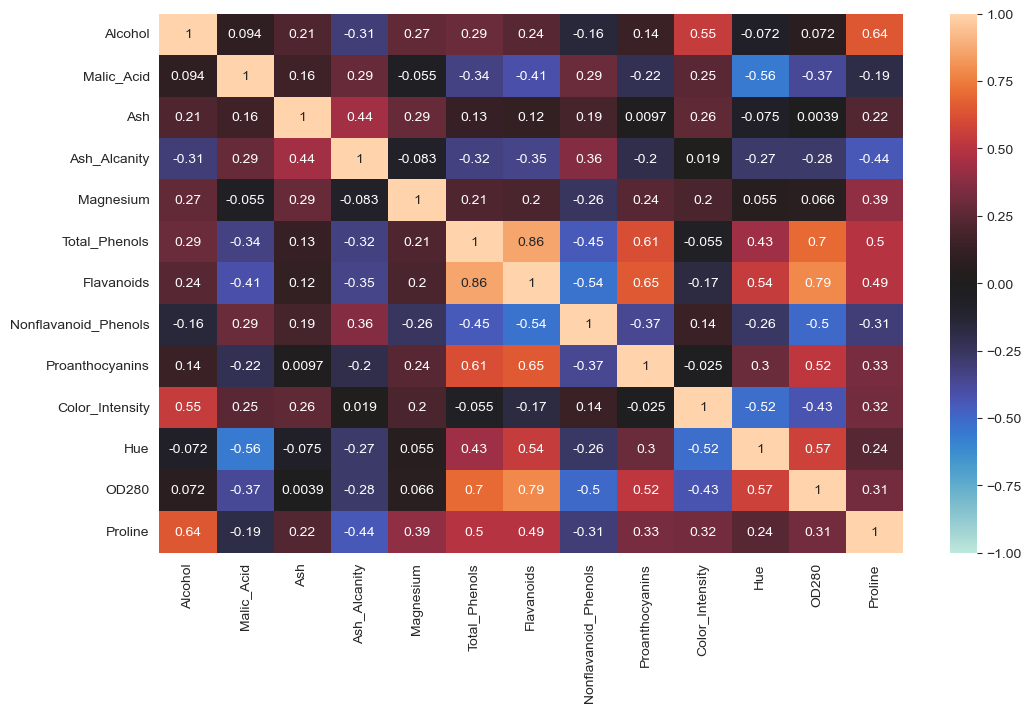

In [67]:

plt.figure(figsize=(12,7))
corr = data.corr()
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True);


In [68]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [69]:
data.describe()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [70]:
# Scaling the Data:
scaler =StandardScaler()

features =scaler.fit(data)
features =features.transform(data)

# Convert to pandas Dataframe
scaled_data =pd.DataFrame(features,columns=data.columns)
# Print the scaled data
scaled_data.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


Text(0, 0.5, 'PC2')

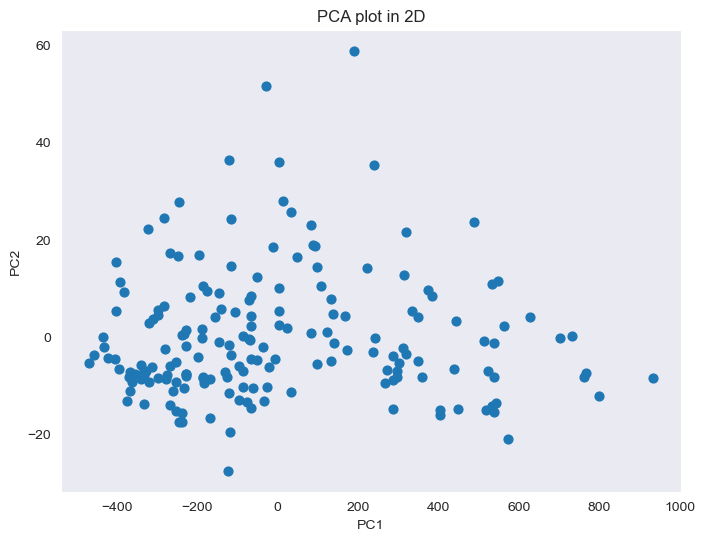

In [71]:
# Figure size
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
plt.figure(figsize=(8,6))
X_pca = pca.fit_transform(data)
principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Find Outliers



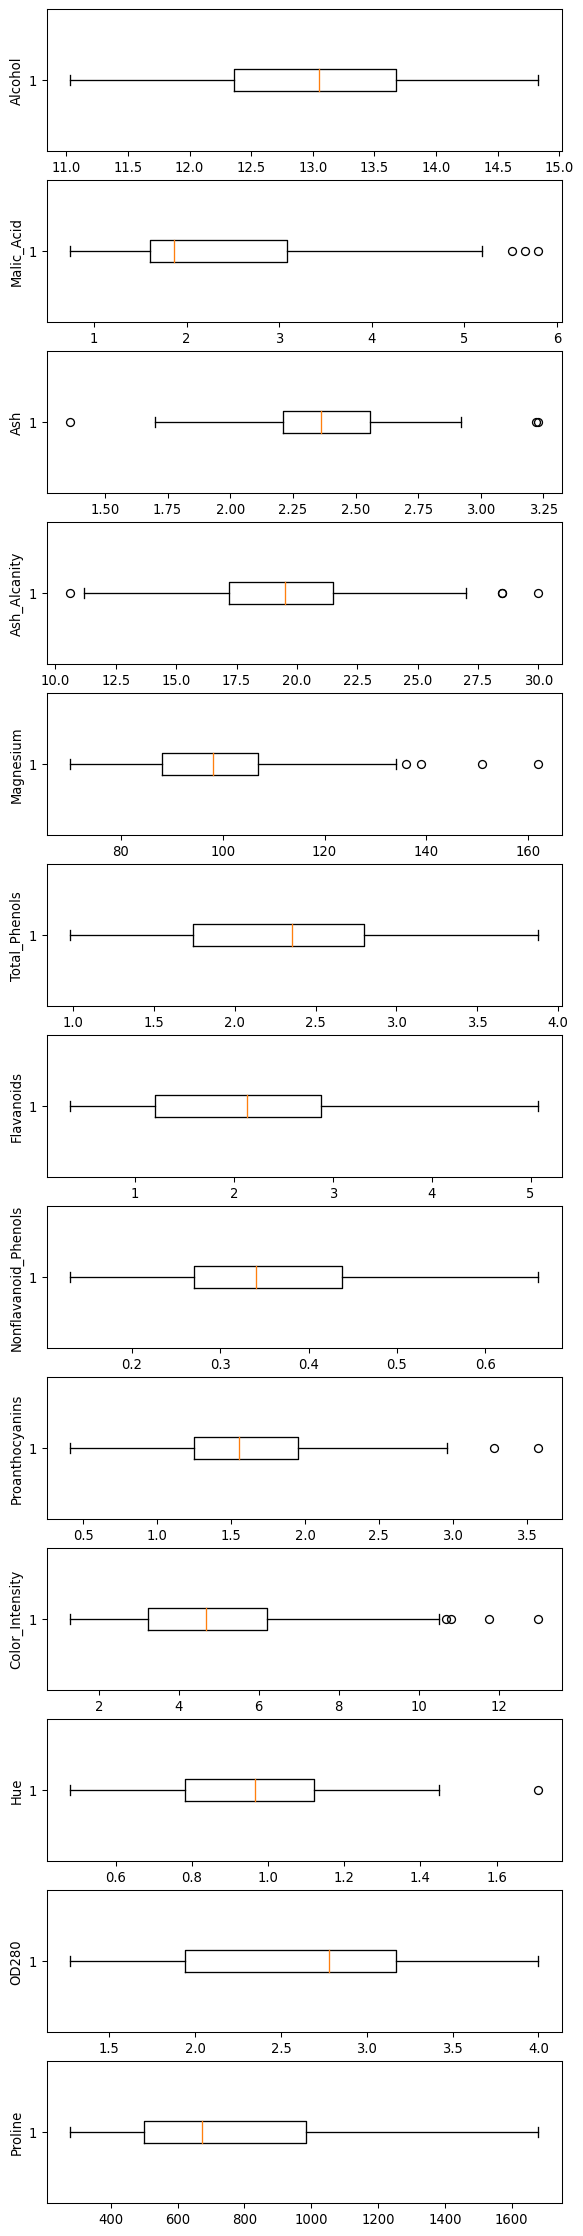

In [39]:
# Box Plots
fig, axs = plt.subplots(13,1,dpi=95, figsize=(7,30))
i = 0
for col in data.columns:
    axs[i].boxplot(data[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

Calculating outliers:

We calculate first quartile (Q1)(25%),

then we find IQR(inter quartile range) = Q3-Q1,

finally compute Q1 - 1.5IQR and Q3 + 1.5IQR,

Anything outside this range is an outlier

In [77]:
def IQR_OutlierRemoval(new_df):  
    Q1 = new_df.quantile(0.25)
    Q3 = new_df.quantile(0.75)
    IQR = Q3 - Q1

    new_data = new_data[~((new_data < (Q1 - 1.5 * IQR)) |(new_data> (Q3 + 1.5 * IQR))).any(axis=1)]

    return new_data
    # plt.show()

df2 = data.copy()

print(df2.shape)
     

(178, 13)


In [79]:

# df2 =IQR_OutlierRemoval(new_data) #outlier removal
# df2.shape

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


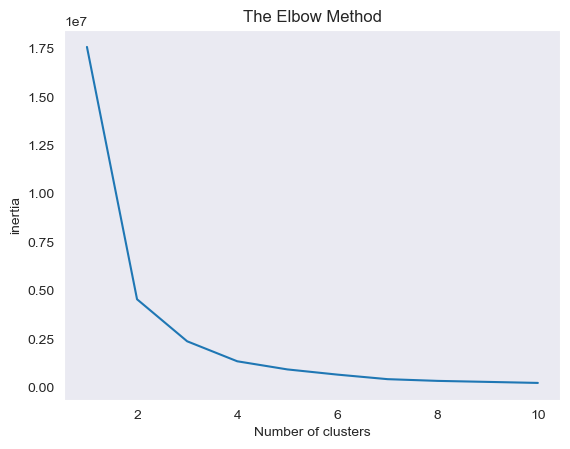

In [88]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

 there is turning like an elbow at k=3. So, we can say that the right number of cluster for the given datasets is 3.

In [89]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)

# Convert to data frame
principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

# Shape and preview
print(principal_df.shape)
principal_df.head()

(178, 2)


,PC1,PC2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'PC2')

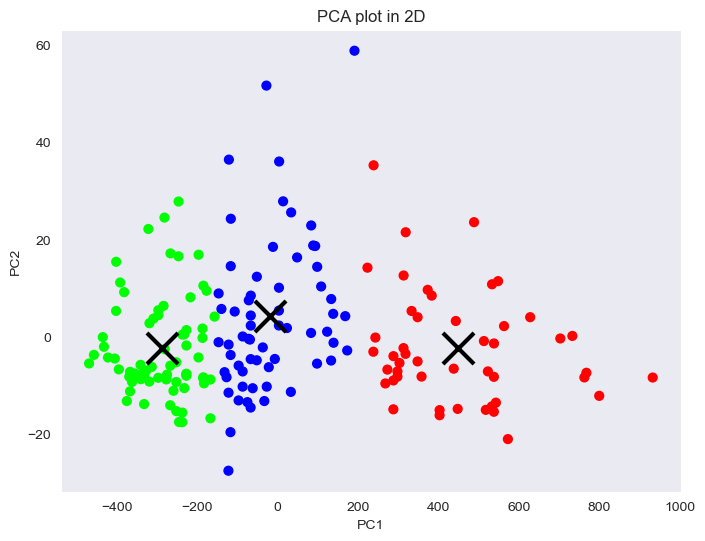

In [90]:
from sklearn.cluster import KMeans
# KMeans
kmeans = KMeans(n_clusters=3, n_init=15, max_iter=500, random_state=0)

# Train and make predictions
clusters = kmeans.fit_predict(data)

# Cluster centers
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
#PCA plot in 2D coloured by cluster

# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')


In [95]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=15, max_iter=500, random_state=0)
    clusters = kmeans.fit_predict(data)
    silhouette_scores.append(silhouette_score(data, clusters))

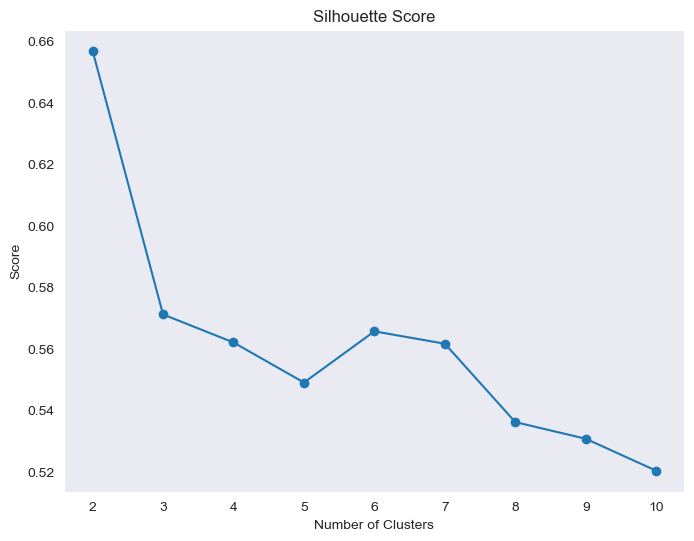

In [96]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [94]:
from sklearn import datasets
from sklearn.metrics import silhouette_score

# Instantiate the KMeans for 5 clusters
km = KMeans(n_clusters=5, random_state=42)
# Fit the KMeans model
km.fit_predict(data)
# Calculate Silhoutte Score
score = silhouette_score(data, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.549


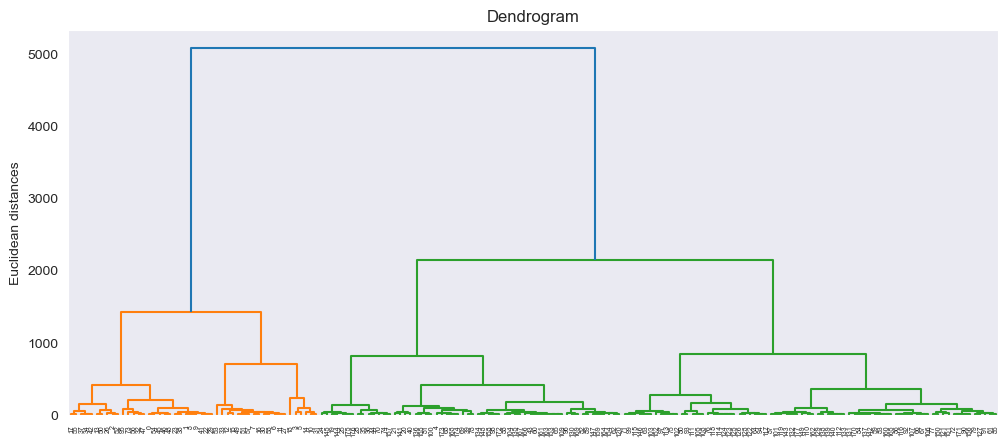

In [92]:
# Plotting a dendrogram
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()


C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


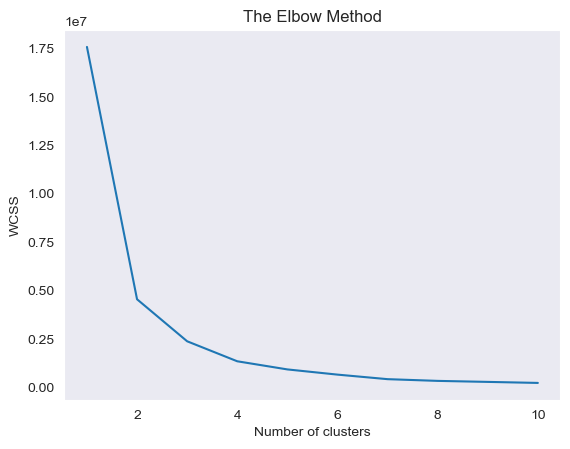

In [93]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [97]:
kmeans


KMeans(max_iter=500, n_clusters=10, n_init=15, random_state=0)

In [91]:
# Implementing K-Means:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)


KMeans(n_clusters=3)

In [89]:
kmeans.cluster_centers_


array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

In [92]:
# Apply Dimensionality Reduction Technique PCA
pca=PCA(n_components=2)

reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])

#Reduced Features
reduced_X.head()


,PCA1,PCA2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [93]:
# Reducing centers:
centers=pca.transform(kmeans.cluster_centers_)

# reduced centers
centers


array([[ 2.2761936 , -0.93205403],
       [-2.72003575, -1.12565126],
       [-0.03695661,  1.77223945]])

In [99]:
pca.components_


array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

In [ ]:
data.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)


In [38]:
from sklearn.decomposition import PCA
from sklearn import decomposition


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


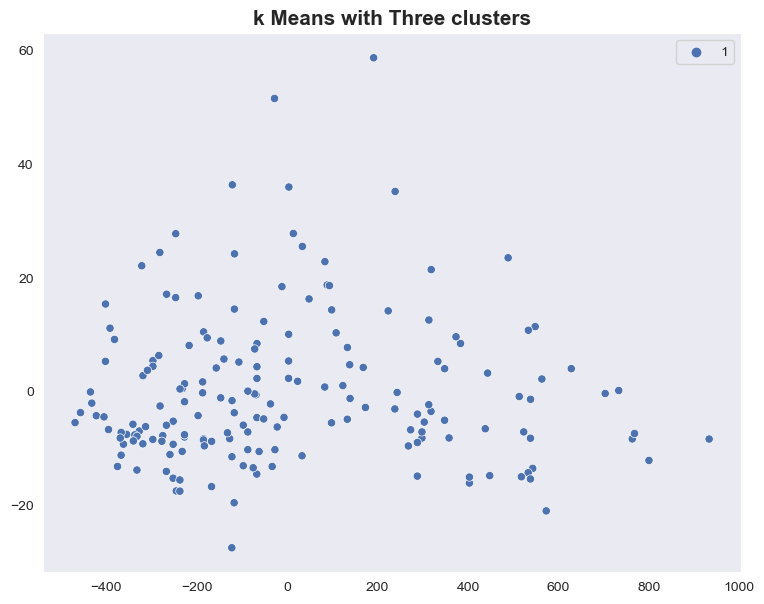

In [42]:
# Transform data to visualize data in 2d
y_kmeans = kmeans.predict(data)
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
wine_pca = pca.fit_transform(data)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=y_kmeans, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("k Means with Three clusters",fontsize=15,fontweight="bold")
plt.show()

In [ ]:
# Calculate Silhouette Score/ Calinski Harabasz Score/ Davies Bouldin Score for 3 clusters separated by k Means
s = silhouette_score(data, y_kmeans)
c = calinski_harabasz_score(data, y_kmeans)
d = davies_bouldin_score(data, y_kmeans) 
print('silhouette_score = ', round(s,2),'\ncalinski_harabasz_score = ', round(c,2), '\ndavies_bouldin_score = ' ,round(d,2))

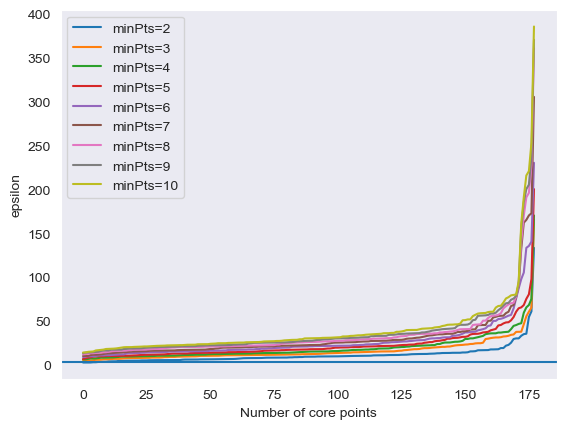

In [51]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# we use sklearn to find the nearest neighbors
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)
for k in range(1, 10):
    distances_k = np.sort(distances[:,k], axis=0)
    plt.plot(distances_k, label='minPts=%i' % (k+1))
sns.set_style('darkgrid')
plt.ylabel('epsilon')
plt.xlabel('Number of core points')
plt.axhline(2.9)
#plt.axhline(2.7)
plt.legend()
plt.show()


In [109]:
dbscan = DBSCAN(eps=3 ,min_samples=2)
dbscan.fit(data)
clusters = dbscan.labels_
len(set(clusters))

4

In [33]:
 clusters


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1,  2, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [34]:
unique, counts = np.unique(clusters, return_counts=True)
np.asarray((unique, counts)).T

array([[ -1, 172],
       [  0,   2],
       [  1,   2],
       [  2,   2]], dtype=int64)

In [110]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
s = silhouette_score(data,clusters)
c = calinski_harabasz_score(data, clusters)
d = davies_bouldin_score(data, clusters) 

print("silhouette_scores:",s)
print("calinski_harabasz_score:",c)
print("davies_bouldin_score:",d)

silhouette_scores: -0.5389236625410517
calinski_harabasz_score: 1.8428522465169626
davies_bouldin_score: 1.0081916490958989


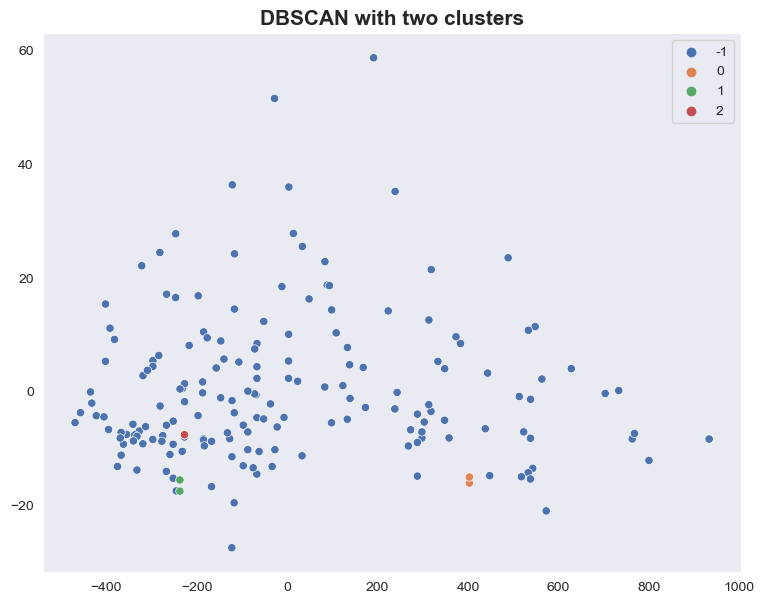

In [111]:
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
wine_pca = pca.fit_transform(data)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=dbscan.labels_, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("DBSCAN with two clusters",fontsize=15,fontweight="bold")
plt.show()
# EM Clusterin

In [112]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
s = silhouette_score(data,clusters)
c = calinski_harabasz_score(data, clusters)
d = davies_bouldin_score(data, clusters) 

print("silhouette_scores:",s)
print("calinski_harabasz_score:",c)
print("davies_bouldin_score:",d)

silhouette_scores: -0.5389236625410517
calinski_harabasz_score: 1.8428522465169626
davies_bouldin_score: 1.0081916490958989
